# COS 3a Exercise 7

---
Submission until 03/12/2024 12:00 p.m.

<span style="color:red">You will need to install pyscf for this exercise manually (`pip install pyscf`) in the corresponding environment. </span>

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Tutorial

### Introduction to Monte Carlo

In general, we can define a Monte Carlo (MC) method as a numerical simulation technique that relies on the generation of random numbers to estimate integration values and probabilistic quantities. This family of methods finds application in solving problems that cannot be solved analytically or with deterministic methods.

Regardless of the MC method considered, we can describe three basic steps:
- Set up a predictive model

- Define the probability distributions of the independent variables
    
- Run repeated simulations with the random values for the independent variables

### Random walk

A basic example for MC simulations is the one-dimensional random walk. This is a stochastic process consisting of a sequence of steps in a one-dimensional space. Each step is randomly generated from the previous point, but is completely independent of the history of the walk.

This method can be applied to a wide range of situations with more complete models, such as the movement of particles in a fluid, stock prices in the market, and gambling behavior.

### Metropolis Monte Carlo Algorithm

The Metropolis Monte Carlo (MMC) method is a specific random walker algorithm, which proposes random steps and accepts or rejects them according to a selection criterion that guarantees convergence to the desired probability distribution.

The Metropolis-Hastings (MH) algorithm allows us to sample an *a priori* distribution $p(x)$, if we know at least the function that generates that distribution. The MH algorithm is based on the normal MMC algorithm, but it changes the way in which the relationship with the new value is generated, because the Hastings version does not require the distribution to be symmetric.

The algorithm can be expressed in following steps:

1. From the proposal distribution $D(x^{0}|x_{i})$, extract one value $x^{0}$

2. Compute the ratio between $x^{0}$ and the current step $x^{*} $ as $\omega = \frac {D(x_{i}|x^{*})f(x^{*})} {D(x^{*}|x_{i})f(x_{i})}$

3. If $\omega ≥ 1$, then $x^{*} = x_{i+1}$

4. If $ \omega < 1 $, admit the possibility that $x^{*} = x_{i+1}$ generating a random factor $r \in [0,1]$:
    - if $ r < \omega$, accept new value and set $x^{*} = x_{i+1}$
    - if $ r \geq \omega$ then $x_{i+1} = x_{i}$  

### Task 1

The goal of the first task is to use the MMC algorithm to sample a function $f(x)$ using different numbers of sample points $n$. We will create a histogram to visualize the function produced by the given MMC simulation.

The MMC algorithm will generate random values but accept them with higher probability since the region of the distribution has a high probability.

The function whose area we want to replicate has the following form:

\begin{equation}
f(x) = 10e^{-4(x+4)^2} + 3e^{-0.2(x+1)^2} + e^{-2(x-5)^2}
\end{equation}

https://www.algorithm-archive.org/contents/metropolis/metropolis.html

Implement a python function to compute eq. 1.

Write a routine that allows to compute the integral of the function for $x\in [-10,10]$ following these steps:

0. Generate starting point $f(x_0)$ using a uniform distribution in the interval to be considered

1. Generate new point $x_{i+1} = x_i + \text{random([-1,1])}$ with 1D random walker, drawing randomly from a uniform distribution in the interval $[-1,1]$

2. Calculate acceptance probability $\omega = \min\left( 1, \frac {f(x_{i+1})}{f(x_{i})} \right)$

3. Generate random number $r \in [0,1]$.

4. If $\omega > r$ ,keep new position and set $f(x_i) = f(x_{i+1})$, otherwise set $f(x_i) = f(x_i)$

5. Repeat steps 1 to 4 $n$ times.

Use your MMC algorithm to sample the distribution with n = 50, 100, 500 and visualize the computed area using histograms (`plt.bar`). 

Briefly describe your results for different numbers of sampling points. Comment on the effect of $x_0$ and $n$ on the outcome of the simulation. 

<span style="color:red"> Solution: </span>

Text(0.5, 0, 'x')

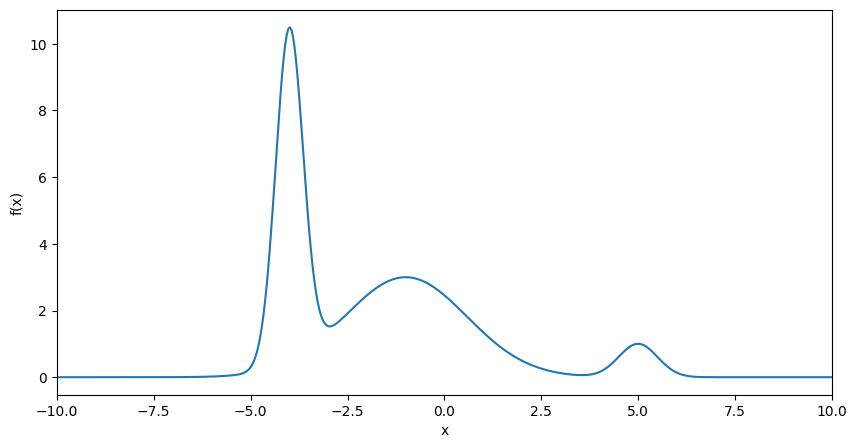

In [11]:
import numpy as np

def f_(x : np.array) -> float:
    """ Compute eq. 1 for given x. """
    f1 = 10 * np.exp(-4 * ((x+4)**2))
    f2 = 3 * np.exp(-0.2 * ((x+1)**2))
    f3 = np.exp(-2 * ((x-5)**2))
    return f1 + f2 + f3

# Generate n equidistant sampling points between -10, 10
n = 500
x = np.linspace(-10,10, n)
#Generate at least 500 equidistant data points representing x in a range from -10 to 10. Then, for each generated points, calculate f(x).
#All points must be equidistant in the range considered.
y = f_(x)

#plot datapoints and visualize the function 
plt.figure(figsize = (10,5))
plt.plot(x, y, '-')
plt.xlim(-10,10)
plt.ylabel("f(x)")
plt.xlabel("x")

In [12]:
def rwMC(npts : float, f : callable, interval : tuple) -> tuple[list[float], list[float]]:
    """ Run a MC simulation with 1D random walker for sampling. 
    
    Args:
        npts (np.array): Number of sampling points to use for MC simulation.
        interval (np.array): 
        f (function): The function to sample.
        interval (tuple): Interval where the function should be sampled
    
    Returns:
        visitedx, visitedy (list): Lists containing the x and y datapoints of the MC simulation.
    """
    i0, i1 = interval
    # Generate random starting point in interval
    x0 = np.random.uniform(i0, i1)
    visitedx, visitedy = [], []
    for n in range(npts):
        # Update position using 1D random walker
        xi = x0 + np.random.uniform(-1,1)
        # Compute acceptance
        w = min(1, f(xi) / f(x0))
        # Update/keep position depending on w 
        if np.random.random() <= w:
            x0 = xi
        
        visitedx.append(x0)
        visitedy.append(f(x0))
    return visitedx, visitedy
    


0 50
1 100
2 1000


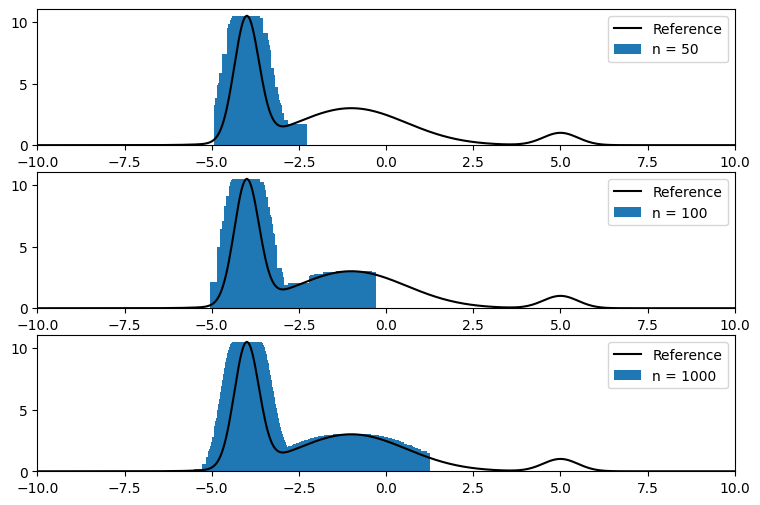

In [13]:
pointset = [50, 100, 1000]
dim = len(pointset)
fig, axes = plt.subplots(dim,1, figsize = (3* dim,2*dim))

for idx, nsample in enumerate(pointset):
    print(idx, nsample)
    a,b = rwMC(nsample, f_, (-10,10))
    axes[idx].plot(x, f_(x), label = f"Reference", color = '#000000')
    axes[idx].bar(a,b, label = f"n = {nsample}")
    axes[idx].set_xlim(-10,10)
    axes[idx].legend()

### Task 2 
<u> Note:</u> It is sensible to read the entire exercise once before you start coding. 
 
We now want to find the equilibrium energy of particles on a  1D lattice using again a single random walker. For convenience, we assume a 1D chain of particles $A$ and $B$ where each position is occupied by either **A** or **B**. Furthermore, only direct neighbour interactions, are considered. The last thing we want to account for are periodic boundary conditions. This means that the particle on the far right interacts with the particle on the far left.

Below, some starting variables for this system (temperature, lattice size, interaction energies) for particle pairs of $A$ and $B$ are provided. These assumptions allow to define the overall lattice energy $E_\mathrm{latt}$ as:
\begin{equation}
E_{latt} = \sum_{i = 1}^{N} \frac{\epsilon_{i-1,i} +\epsilon_{i,i-1}}{2}
\end{equation}\tag{2}
since the energy of all $N$ particles $i$ is just the average of the direct neighbour pair interaction $\epsilon_{ij}$, where $j = i-1, i+1$. 


Write a function that computes the lattice energy from a vector input that encodes the 1D lattice of (randomly) distributed particles $A$ and $B$. 

Use the definition of the lattice energy to realize an implementation of a MMC algorithm to find a solution to the equlibrium energy. To do so, implement the following necessary steps:

1. Define the (random) 1D lattice.

2. Calculate the initial lattice energy of the system $E_0$ using your previously defined function.

3. Randomly select two positions on the lattice and propose an exchange of particle positions on the lattice. 

4. Calculate the new energy of the system $E_1$.

5. Use the MMC selection criterion: $\exp\left(-\frac{\Delta E}{k_\mathrm{B}\cdot T}\right) > Z$ 
to check, if the particle swap is to be accepted or not. $Z\in [0,1]$ is a random number.
    * If the jump is accepted, update the lattice energy and store the information in `MCS` and `ehist` (see below)
    * If the jump is rejected, maintain the original lattice

6. Repeat this process until convergence or the maximum number of steps `nmax` for your simulation is reached.  

In addition, please include these "optional" steps to analyze the results of your MMC simulation (optional here means that these are in principle not necessary to realize the plain MMC algorithm, but you should realize it in your code!):

7. Define variables `MCS` and `ehist` that record how many 'particle swaps' were accepted and track the lattice energy progression in the MMC simulation respectively.

8. Add an additional threshold of MCS > 5e4 as termination criterion.

9. Summarize and prinout the results of your MMC routine. Provide the initial and equilibrium lattice energy (if the latter is obtained), or write-out that the simulation did not converge. 

Perform a set of simulations for the lattice: 

`exercise_lattice = np.random.choice([0, 1], size=1000)`
using the random seed "2000" (`np.random.seed(2000)`)

Determine reasonable settings to reliably converge towards the equilibrium energy of the system and briefly describe how you determined those.

Modify `e_aa = 0.20` and repeat your simulations. Describe the effect this modification has on your MMC simulations.



In [14]:
# Define direct neighbour interaction energies 
e_aa = 0.42 # A-A interaction in eV
e_bb = 0.42 # B-B interaction in eV
e_ab = 0.56 #i A-B interaction in eV
energy_table = np.array([e_aa, e_ab, e_bb])

# Simulation conditions
import scipy.constants as sc
Tsim = 800
kb = sc.k / sc.electron_volt # in eV/ K 

In [15]:
example_lattice = np.array([ 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0])
#print(f"{calc_lattice_energy1D(example_lattice):.2f} eV")

<span style="color:red"> Solution: </span>

In [16]:
def calc_lattice_energy1D(lattice : np.array) -> float:
    """ Compute the lattice energy of a 1D lattice of A, B particles according to eq. 2.
    
    Args:
        lattice (np.array): Vector of A, B particles on lattice.
    
    Returns:
        elatt (float): The lattice energy.
    """

    elatt = 0
    latdim = len(lattice)

    #iterate for every particles:
    for i in range(latdim):

        # Particle type of i-th position
        particle = lattice[i]

        # Left and right neighbour particle type
        #print(f"(-): {i} | {(i-1)} | {(i-1) % latdim}")
        #print(f"(+): {i} | {(i+1)} | {(i+1) % latdim}")
        nl = lattice[(i-1)]
        nr = lattice[(i+1) % latdim]

        # i-th interaction energy
        eps = (energy_table[particle + nl] + energy_table[particle + nr]) / 2
        
        elatt += eps

    return elatt

In [17]:
def mmc_selection(eps : float, T : float = 298) -> float:
    """ Compute MMC selection criterion. 
    
    Args:
        eps (float): Energy difference between i+1, i step (in eV).
        T (float, optional): Thermodynamic temperature (in K). Defaults to 298 K.
    
    Returns: 
        The Boltzmann factor.
    """
    return np.exp(-eps/(kb * T))

def indextuple(idx):
    """ Helper function to handle 1D and 2D particle selection. """
    try:
        return tuple(idx)
    except:
        return idx

def runMMC(lattice : np.array, 
           energy_estimator : callable, 
           nmax : int = 100, nmaxs : int = int(5e4),
           verbose = False, 
           **kwargs) -> tuple[float, int, np.array]:
    """ Perform MMC simulation on 1D or 2D lattice. 
    
    Args:
        lattice (np.array): The lattice, which should be sampled.
        energy_estimator (callable): Function to return the energy of our system.
        nmax (int, optional): Maximum number of MMC steps. Defaults to 500
        nmaxs (int, optional): The maximum number of MCS to allow. Defaults to min(nmax, nmaxs).
        verbose (bool, optional): Additional printout for run. Defaults to False.
    
    Returns:
        Final lattice energy (float), number of accepted MMC steps (int), energy history (np.array) and lattice configurations per MMC step np.array(np.array) 
    """

    if verbose:
        nmaxs = min(nmaxs, nmax)
        print(f"Max MC Steps : {nmax}")
        print(f"Max particle swaps allowed: {nmaxs}")
        latdim = lattice.shape[0]
        print(f"Lattice dimension: {latdim}")
        print(f"Energy computed with: {energy_estimator.__name__}")

    # Calculate initial energy
    e_old = energy_estimator(lattice)
    print(f"Initial lattice energy: {e_old:.2f} eV")

    # Initialize variables to track simulation
    mcs = 0
    ehist = [e_old]
    step = 0

    # Mostly relevant for exercise 3 - show particle arangement in lattice 
    latconf = []

    # Define termination criteria: Either reaching max number of steps or making max number of allowed swaps 
    while (step < nmax) and (mcs < nmaxs):
        # This randomly selects two particles for interchange, excluding selection of identical particle since this does not change the energy
        #a_, b_ = np.random.choice(latdim, size = 2, replace = False)
        #lattice[a_], lattice[b_] = lattice[b_], lattice[a_]

        # This is generalized to work for the 2D case as well. 
        a_, b_ = np.random.choice(lattice.shape[0], size = lattice.ndim * [2])


        # Perform swap 
        lattice[indextuple(a_)], lattice[indextuple(b_)] = lattice[indextuple(b_)], lattice[indextuple(a_)]
        
        # Calculate new energy
        e_new = energy_estimator(lattice)
  
        # Evalute if step should be accepted according to step 5
        if mmc_selection(e_new-e_old, **kwargs) >= np.random.random():
            
            # Update system energy
            e_old = e_new
            # Update mcs, MC step and energy history
            ehist.append(e_old)
            mcs += 1

        # Else undo swap
        else:
            #lattice[a_], lattice[b_] = lattice[b_], lattice[a_]
            lattice[indextuple(a_)], lattice[indextuple(b_)] = lattice[indextuple(b_)], lattice[indextuple(a_)]

        # Copy necessary, otherwise trj false. See also:
        # https://www.geeksforgeeks.org/array-copying-in-python/
        latconf.append(lattice.copy())

        step += 1
        if verbose and (step % (nmax // 10) == 0): 
            print(f"{step / nmax:.1%}", end=" ")

    if verbose:
        print(f"\nMMC simulation terminated after {step} MMC steps.")
        print(f"Acceptance ratio {mcs/step:.2f}")
        print(f"Final lattice energy: {e_old:.2f} eV")


    return e_old, mcs, np.array(ehist), np.array(latconf)

In [18]:
np.random.seed(1000)
exercise_lattice = np.random.choice([0, 1], size=100)

eeq, accepted_swaps, etrj, confs = runMMC(lattice=exercise_lattice, 
                                   energy_estimator= calc_lattice_energy1D,
                                    T = Tsim, 
                                    nmax=50)
print(confs)

Initial lattice energy: 49.56 eV
[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]]


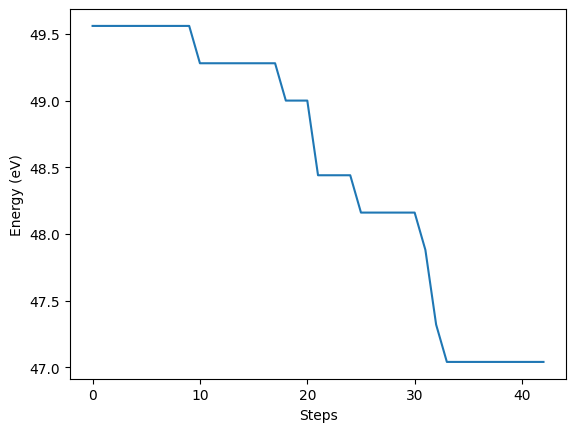

In [19]:
# Plot the energy and configuration history
plt.plot(etrj)
plt.xlabel("Steps")
plt.ylabel("Energy (eV)")
plt.show()

## Tutorial

### Heat Maps

For the following task, we wish to visualize a 2D lattice. To do so, we can use *heatmaps* with the [`plt.imshow`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function. Below you can find a small example to make you familiar on how to use heatmaps for the upcoming MC simulation. Behind the scene, there is some interpolation happening for color coding of the matrix elements, but for the purpose of this exercise, you need not care about that. If you are interested in that, you can follow the link for more information. 

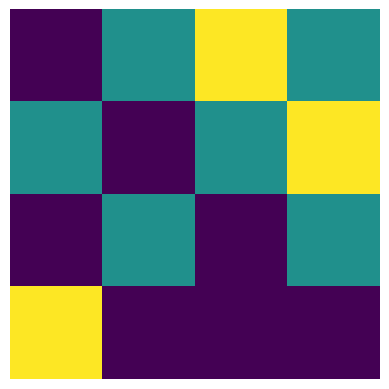

In [20]:
# Example matrix to visualize 4x4 matrix
md_list = np.array([
    [0,1,2,1], 
    [1,0,1,2], 
    [0,1,0,1],
    [2,0,0,0]]
)
plt.imshow(md_list)
plt.axis("off")
plt.show()

### Task 3

The last task will essentially expand the previous example of a 1D lattice to two dimensions. In this system, we have to consider four direct neighbour interactions per particle. Analogous to task 2, the lattice energy now takes the form (eq. 3):

\begin{equation}
\varepsilon_{lattice} = \sum_{i = 1}^{n},\sum_{j = 1}^{m} \frac{ \epsilon_{(i-1)j,ij} + \epsilon_{(i+1)j,ij} + \epsilon_{i(j-1),ij} + \epsilon_{i(j+1),ij} }{2}
\end{equation}\tag{3}

where n and m are the dimensions of the 2D lattice, which is a square matrix in our case. $\epsilon_{(i-1)j,ij}, ...$ represent the energies associated with the direct neighbour particles on the left, right, top and bottom of the considered particle located at position $(i,j)$.

In this task we will encode a two-step random walker, which means that for each step we will exchange two random particles at the same time.

Implement a new function to calculate the 2D lattice energy taking a matrix encoding the fully occupied lattice, again only containing A,B particles, as input. 

Implement the code necessary to do a MMC simulation of the 2D lattice and adapt the output such that the lattice position is given (per MMC step or just initial and final configuration). Visualize the intial and final configuration of the 2D lattice as heatmaps. Use appropriate settings to minimize (or equilibrate) the lattice energy.

Briefly state how the final configuration of the 2D lattice is affected, if the values for the pair interactions ($E_{AA}, E_{BB} \leftrightarrow E_{AB}$) are changed. 

<span style="color:red"> Solution: </span>

In [21]:
def calc_lattice_energy2D(lattice : np.array) -> float:
    """ Compute the lattice energy of a 2D lattice of A, B particles according to eq. 3.
    
    Args:
        lattice (np.array): Matrix of A, B particles on lattice.
    
    Returns:
        elatt (float): The lattice energy.
    """

    elatt = 0
    latdim = len(lattice)
    dima, dimb = lattice.shape

    #iterate for every particles:
    for i in range(dima):
        for j in range(dimb):

            # Particle type of i-th position
            particle = lattice[i,j]

            # Store direct neighbours as tuple 
            nl = lattice[i, (j - 1) % latdim]
            nr = lattice[i, (j + 1) % latdim]
            nt = lattice[(i - 1) % latdim, j]
            nb = lattice[(i + 1) % latdim, j]

            # i-th interaction energy
            eps = (energy_table[particle + nl] + energy_table[particle + nr] + energy_table[particle + nt] + energy_table[particle + nb]) / 2
            
            elatt += eps

    return elatt


In [22]:
exercise_2dlattice = np.random.choice([0,1], size = (25,25))

In [23]:
eeq, accepted_swaps, etrj, confs = runMMC(lattice=exercise_2dlattice, 
                                   energy_estimator= calc_lattice_energy2D,
                                    T = Tsim, 
                                    nmax=12000, verbose = True)
#print(confs)

Max MC Steps : 12000
Max particle swaps allowed: 12000
Lattice dimension: 25
Energy computed with: calc_lattice_energy2D
Initial lattice energy: 610.40 eV
10.0% 20.0% 30.0% 40.0% 50.0% 60.0% 70.0% 80.0% 90.0% 100.0% 
MMC simulation terminated after 12000 MMC steps.
Acceptance ratio 0.55
Final lattice energy: 550.48 eV


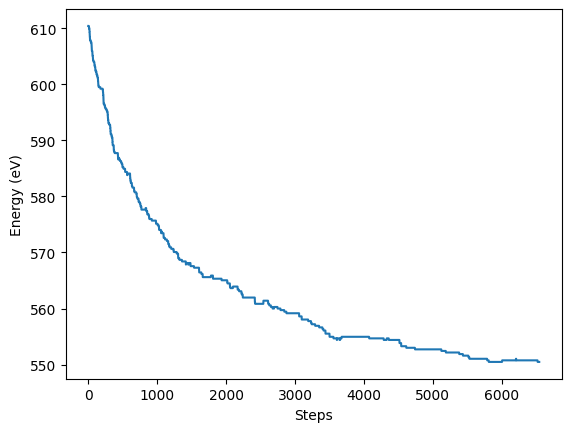

In [24]:
plt.plot(etrj)
plt.xlabel("Steps")
plt.ylabel("Energy (eV)")
plt.show()

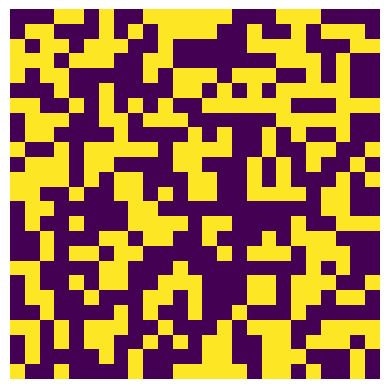

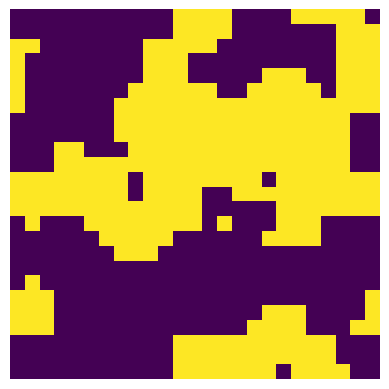

In [25]:
# Represent the starting and final configuration
plt.imshow(confs[0])
plt.axis("off")
#plt.savefig("2d_init.png", dpi=300)
plt.show()
# Represent the starting and final configuration
plt.imshow(confs[-1])
plt.axis("off")
#plt.savefig("2d_final.png", dpi=300)
plt.show()

<u>Comment:</u> 

The result of our simulations can be divided into two cases: 

- If $E_{AA}, E_{BB} > E_{AB} \implies$ Phase Separation
- If $E_{AA}, E_{BB} < E_{AB} \implies$ Ideal Mixing

which holds for ideal solutions. The MMC simulation minimizes the lattice energy, so favoured (pair) interactions are accepted in the stochastic process.